In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import OneHotEncoder
#test

## Loading the data

In [2]:
data = pd.read_csv("C:/Users/Riyasingh/Downloads/data.csv")
data

ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government                 NaN   
3                       NaN                 NaN   
4                       NaN                 NaN   
...                     ...                 ...   
209494                  NaN         High school   
209495                  NaN                 NaN   
209496                  NaN                 NaN   
209497              Private                 NaN   
209498     Local government         High school   

                          marital_status                        race  \
0                                Widowed                       White   
1                                Widowed                       White   
2                          Never married                       Black   
3                          Never married   Asian or Pacific Islander   
4        Married-civilian spouse present                       White   
...                                  ...                         ...   
209494                     Never married                       White   
209495   Married-civilian spouse present                       White   
209496                     Never married                       White   
209497   Married-civilian spouse present                       White   
209498                     Never married                       Black   

       is_hispanic      employment_commitment unemployment_reason  \
0        All other         Not in labor force                 NaN   
1        All other   Children or Armed Forces                 NaN   
2        All other   Children or Armed Forces                 NaN   
3        All other   Children or Armed Forces                 NaN   
4        All other         Not in labor force                 NaN   
...            ...                        ...                 ...   
209494   All other         Not in labor force                 NaN   
209495   All other         Not in labor force                 NaN   
209496   All other   Children or Armed Forces                 NaN   
209497   All other   Children or Armed Forces                 NaN   
209498   All other   Children or Armed Forces          Re-entrant   

        employment_stat  wage_per_hour is_labor_union  working_week_per_year  \
0                     0              0            NaN                     52   
1                     0              0            NaN                      0   
2                     0            500             No                     15   
3                     0              0            NaN                      0   
4                     0              0            NaN                      0   
...                 ...            ...            ...                    ...   
209494                0              0            NaN                      0   
209495                0              0            NaN                      0   
209496                0              0            NaN                      0   
209497                0            700             No                     52   
209498                0              0          

In [3]:
data1=pd.DataFrame(data)


In [4]:
data1

ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government                 NaN   
3                       NaN                 NaN   
4                       NaN                 NaN   
...                     ...                 ...   
209494                  NaN         High school   
209495                  NaN                 NaN   
209496                  NaN                 NaN   
209497              Private                 NaN   
209498     Local government         High school   

                          marital_status                        race  \
0                                Widowed                       White   
1                                Widowed                       White   
2                          Never married                       Black   
3                          Never married   Asian or Pacific Islander   
4        Married-civilian spouse present                       White   
...                                  ...                         ...   
209494                     Never married                       White   
209495   Married-civilian spouse present                       White   
209496                     Never married                       White   
209497   Married-civilian spouse present                       White   
209498                     Never married                       Black   

       is_hispanic      employment_commitment unemployment_reason  \
0        All other         Not in labor force                 NaN   
1        All other   Children or Armed Forces                 NaN   
2        All other   Children or Armed Forces                 NaN   
3        All other   Children or Armed Forces                 NaN   
4        All other         Not in labor force                 NaN   
...            ...                        ...                 ...   
209494   All other         Not in labor force                 NaN   
209495   All other         Not in labor force                 NaN   
209496   All other   Children or Armed Forces                 NaN   
209497   All other   Children or Armed Forces                 NaN   
209498   All other   Children or Armed Forces          Re-entrant   

        employment_stat  wage_per_hour is_labor_union  working_week_per_year  \
0                     0              0            NaN                     52   
1                     0              0            NaN                      0   
2                     0            500             No                     15   
3                     0              0            NaN                      0   
4                     0              0            NaN                      0   
...                 ...            ...            ...                    ...   
209494                0              0            NaN                      0   
209495                0              0            NaN                      0   
209496                0              0            NaN                      0   
209497                0            700             No                     52   
209498                0              0          

## EDA 

In [5]:
data1.nunique()

ID                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

In [6]:
data1.isnull()

ID    age  gender  education  class  education_institute  \
0       False  False   False      False   True                 True   
1       False  False   False      False   True                 True   
2       False  False   False      False  False                 True   
3       False  False   False      False   True                 True   
4       False  False   False      False   True                 True   
...       ...    ...     ...        ...    ...                  ...   
209494  False  False   False      False   True                False   
209495  False  False   False      False   True                 True   
209496  False  False   False      False   True                 True   
209497  False  False   False      False  False                 True   
209498  False  False   False      False  False                False   

        marital_status   race  is_hispanic  employment_commitment  \
0                False  False        False                  False   
1                False  False        False                  False   
2                False  False        False                  False   
3                False  False        False                  False   
4                False  False        False                  False   
...                ...    ...          ...                    ...   
209494           False  False        False                  False   
209495           False  False        False                  False   
209496           False  False        False                  False   
209497           False  False        False                  False   
209498           False  False        False                  False   

        unemployment_reason  employment_stat  wage_per_hour  is_labor_union  \
0                      True            False          False            True   
1                      True            False          False            True   
2                      True            False          False           False   
3                      True            False          False            True   
4                      True            False          False            True   
...                     ...              ...            ...             ...   
209494                 True            False          False            True   
209495                 True            False          False            True   
209496                 True            False          False            True   
209497                 True            False          False           False   
209498                False            False          False            True   

        working_week_per_year  industry_code  industry_code_main  \
0                       False          False               False   
1                       False          False               False   
2                       False          False               False   
3                       False          False               False   
4                       False          False               False   
...                       ...            ...                 ...   
209494                  False          False               False   
209495                  False          False               False   
209496                  False          False               False   
209497                  False          False               False   
209498                  False          False               False   

        occupation_code  occupation_code_main  total_employed  household_stat  \
0                 False                  True           False           False   
1                 False                  True           False           False   
2                 False                 False           False           False   
3                 False                  True           False           False   
4                 False                  True           False           False   
...                 ...                   ...             ...             ...

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
data1.describe().T

count         mean          std    min      25%  \
age                    209499.0    34.518728    22.306738   0.00    15.00   
employment_stat        209499.0     0.176760     0.555562   0.00     0.00   
wage_per_hour          209499.0    55.433487   276.757327   0.00     0.00   
working_week_per_year  209499.0    23.158850    24.397963   0.00     0.00   
industry_code          209499.0    15.332398    18.049655   0.00     0.00   
occupation_code        209499.0    11.321734    14.460839   0.00     0.00   
total_employed         209499.0     1.956067     2.365154   0.00     0.00   
vet_benefit            209499.0     1.515854     0.850853   0.00     2.00   
gains                  209499.0   435.926887  4696.359500   0.00     0.00   
losses                 209499.0    36.881737   270.383302   0.00     0.00   
stocks_status          209499.0   194.533420  1956.375501   0.00     0.00   
mig_year               209499.0    94.499745     0.500001  94.00    94.00   
importance_of_record   209499.0  1740.888324   995.559557  37.87  1061.29   

                           50%      75%      max  
age                      33.00    50.00     90.0  
employment_stat           0.00     0.00      2.0  
wage_per_hour             0.00     0.00   9999.0  
working_week_per_year     8.00    52.00     52.0  
industry_code             0.00    33.00     51.0  
occupation_code           0.00    26.00     46.0  
total_employed            1.00     4.00      6.0  
vet_benefit               2.00     2.00      2.0  
gains                     0.00     0.00  99999.0  
losses                    0.00     0.00   4608.0  
stocks_status             0.00     0.00  99999.0  
mig_year                 94.00    95.00     95.0  
importance_of_record   1617.04  2185.48  18656.3

In [9]:
data1.replace({' ?':np.NaN},inplace=True)

In [10]:
data1

ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government                 NaN   
3                       NaN                 NaN   
4                       NaN                 NaN   
...                     ...                 ...   
209494                  NaN         High school   
209495                  NaN                 NaN   
209496                  NaN                 NaN   
209497              Private                 NaN   
209498     Local government         High school   

                          marital_status                        race  \
0                                Widowed                       White   
1                                Widowed                       White   
2                          Never married                       Black   
3                          Never married   Asian or Pacific Islander   
4        Married-civilian spouse present                       White   
...                                  ...                         ...   
209494                     Never married                       White   
209495   Married-civilian spouse present                       White   
209496                     Never married                       White   
209497   Married-civilian spouse present                       White   
209498                     Never married                       Black   

       is_hispanic      employment_commitment unemployment_reason  \
0        All other         Not in labor force                 NaN   
1        All other   Children or Armed Forces                 NaN   
2        All other   Children or Armed Forces                 NaN   
3        All other   Children or Armed Forces                 NaN   
4        All other         Not in labor force                 NaN   
...            ...                        ...                 ...   
209494   All other         Not in labor force                 NaN   
209495   All other         Not in labor force                 NaN   
209496   All other   Children or Armed Forces                 NaN   
209497   All other   Children or Armed Forces                 NaN   
209498   All other   Children or Armed Forces          Re-entrant   

        employment_stat  wage_per_hour is_labor_union  working_week_per_year  \
0                     0              0            NaN                     52   
1                     0              0            NaN                      0   
2                     0            500             No                     15   
3                     0              0            NaN                      0   
4                     0              0            NaN                      0   
...                 ...            ...            ...                    ...   
209494                0              0            NaN                      0   
209495                0              0            NaN                      0   
209496                0              0            NaN                      0   
209497                0            700             No                     52   
209498                0              0          

In [11]:
print("rows : ",data1.shape[0],"Colounms : ",data1.shape[1])

rows :  209499 Colounms :  43


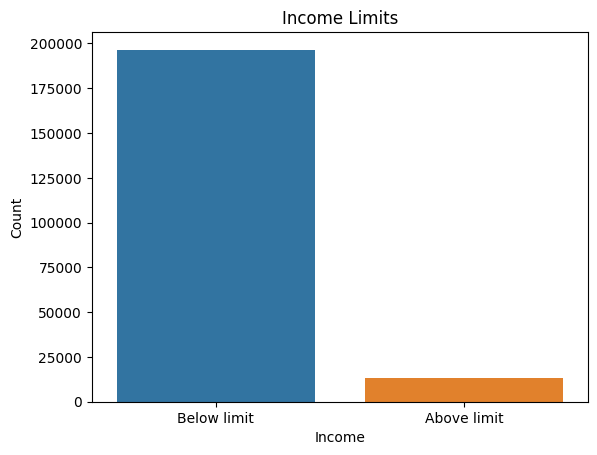

In [12]:




# Assuming 'income_above_limit' is a column in your DataFrame 'data1'
# Get the value counts
income_counts = data1['income_above_limit'].value_counts()

# Create a bar plot
sns.barplot(x=income_counts.index, y=income_counts.values)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Limits')

# Show the plot
plt.show()




In [13]:
data1.replace({' ?':np.nan},inplace=True)

In [14]:
data1

ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government                 NaN   
3                       NaN                 NaN   
4                       NaN                 NaN   
...                     ...                 ...   
209494                  NaN         High school   
209495                  NaN                 NaN   
209496                  NaN                 NaN   
209497              Private                 NaN   
209498     Local government         High school   

                          marital_status                        race  \
0                                Widowed                       White   
1                                Widowed                       White   
2                          Never married                       Black   
3                          Never married   Asian or Pacific Islander   
4        Married-civilian spouse present                       White   
...                                  ...                         ...   
209494                     Never married                       White   
209495   Married-civilian spouse present                       White   
209496                     Never married                       White   
209497   Married-civilian spouse present                       White   
209498                     Never married                       Black   

       is_hispanic      employment_commitment unemployment_reason  \
0        All other         Not in labor force                 NaN   
1        All other   Children or Armed Forces                 NaN   
2        All other   Children or Armed Forces                 NaN   
3        All other   Children or Armed Forces                 NaN   
4        All other         Not in labor force                 NaN   
...            ...                        ...                 ...   
209494   All other         Not in labor force                 NaN   
209495   All other         Not in labor force                 NaN   
209496   All other   Children or Armed Forces                 NaN   
209497   All other   Children or Armed Forces                 NaN   
209498   All other   Children or Armed Forces          Re-entrant   

        employment_stat  wage_per_hour is_labor_union  working_week_per_year  \
0                     0              0            NaN                     52   
1                     0              0            NaN                      0   
2                     0            500             No                     15   
3                     0              0            NaN                      0   
4                     0              0            NaN                      0   
...                 ...            ...            ...                    ...   
209494                0              0            NaN                      0   
209495                0              0            NaN                      0   
209496                0              0            NaN                      0   
209497                0            700             No                     52   
209498                0              0          

In [15]:
data1.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [16]:
data1.dropna().sum()

ID                                  0
age                                 0
gender                              0
education                           0
class                               0
education_institute                 0
marital_status                      0
race                                0
is_hispanic                         0
employment_commitment               0
unemployment_reason                 0
employment_stat                     0
wage_per_hour                       0
is_labor_union                      0
working_week_per_year               0
industry_code                       0
industry_code_main                  0
occupation_code                     0
occupation_code_main                0
total_employed                      0
household_stat                      0
household_summary                   0
under_18_family                     0
veterans_admin_questionnaire        0
vet_benefit                         0
tax_status                          0
gains       

In [17]:
data1

ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government                 NaN   
3                       NaN                 NaN   
4                       NaN                 NaN   
...                     ...                 ...   
209494                  NaN         High school   
209495                  NaN                 NaN   
209496                  NaN                 NaN   
209497              Private                 NaN   
209498     Local government         High school   

                          marital_status                        race  \
0                                Widowed                       White   
1                                Widowed                       White   
2                          Never married                       Black   
3                          Never married   Asian or Pacific Islander   
4        Married-civilian spouse present                       White   
...                                  ...                         ...   
209494                     Never married                       White   
209495   Married-civilian spouse present                       White   
209496                     Never married                       White   
209497   Married-civilian spouse present                       White   
209498                     Never married                       Black   

       is_hispanic      employment_commitment unemployment_reason  \
0        All other         Not in labor force                 NaN   
1        All other   Children or Armed Forces                 NaN   
2        All other   Children or Armed Forces                 NaN   
3        All other   Children or Armed Forces                 NaN   
4        All other         Not in labor force                 NaN   
...            ...                        ...                 ...   
209494   All other         Not in labor force                 NaN   
209495   All other         Not in labor force                 NaN   
209496   All other   Children or Armed Forces                 NaN   
209497   All other   Children or Armed Forces                 NaN   
209498   All other   Children or Armed Forces          Re-entrant   

        employment_stat  wage_per_hour is_labor_union  working_week_per_year  \
0                     0              0            NaN                     52   
1                     0              0            NaN                      0   
2                     0            500             No                     15   
3                     0              0            NaN                      0   
4                     0              0            NaN                      0   
...                 ...            ...            ...                    ...   
209494                0              0            NaN                      0   
209495                0              0            NaN                      0   
209496                0              0            NaN                      0   
209497                0            700             No                     52   
209498                0              0          

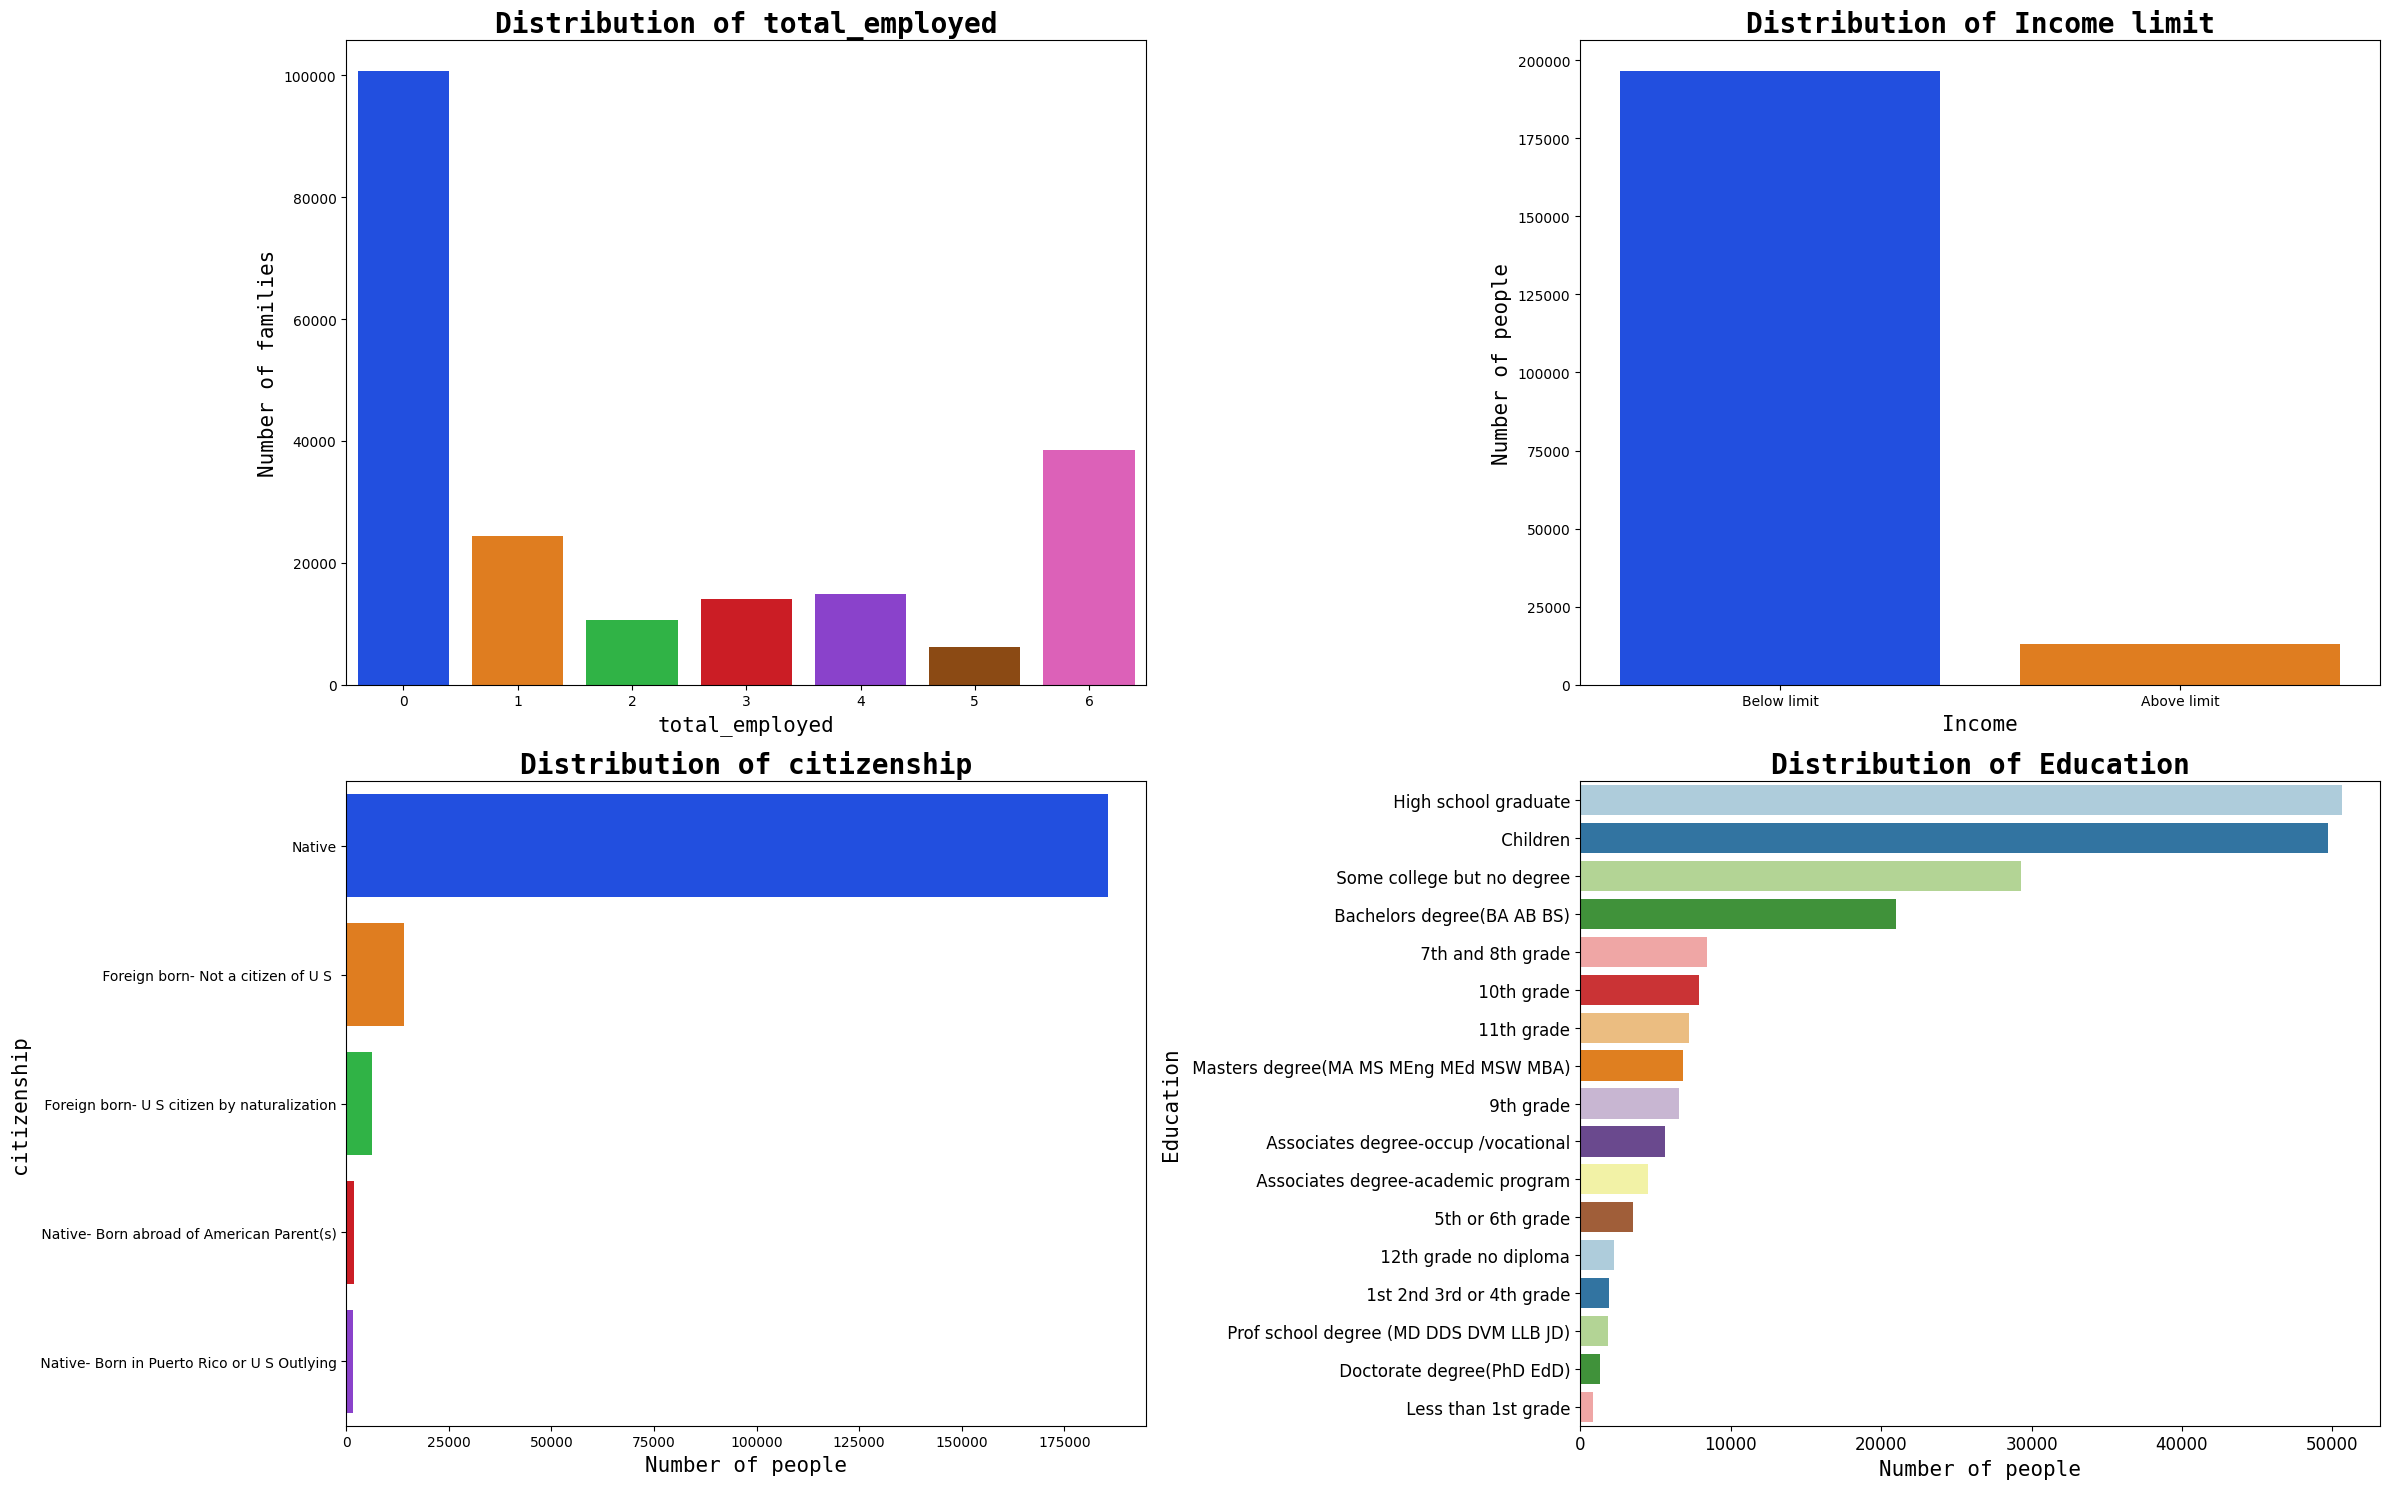

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = data1  ['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = data1['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = data1['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = data1['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

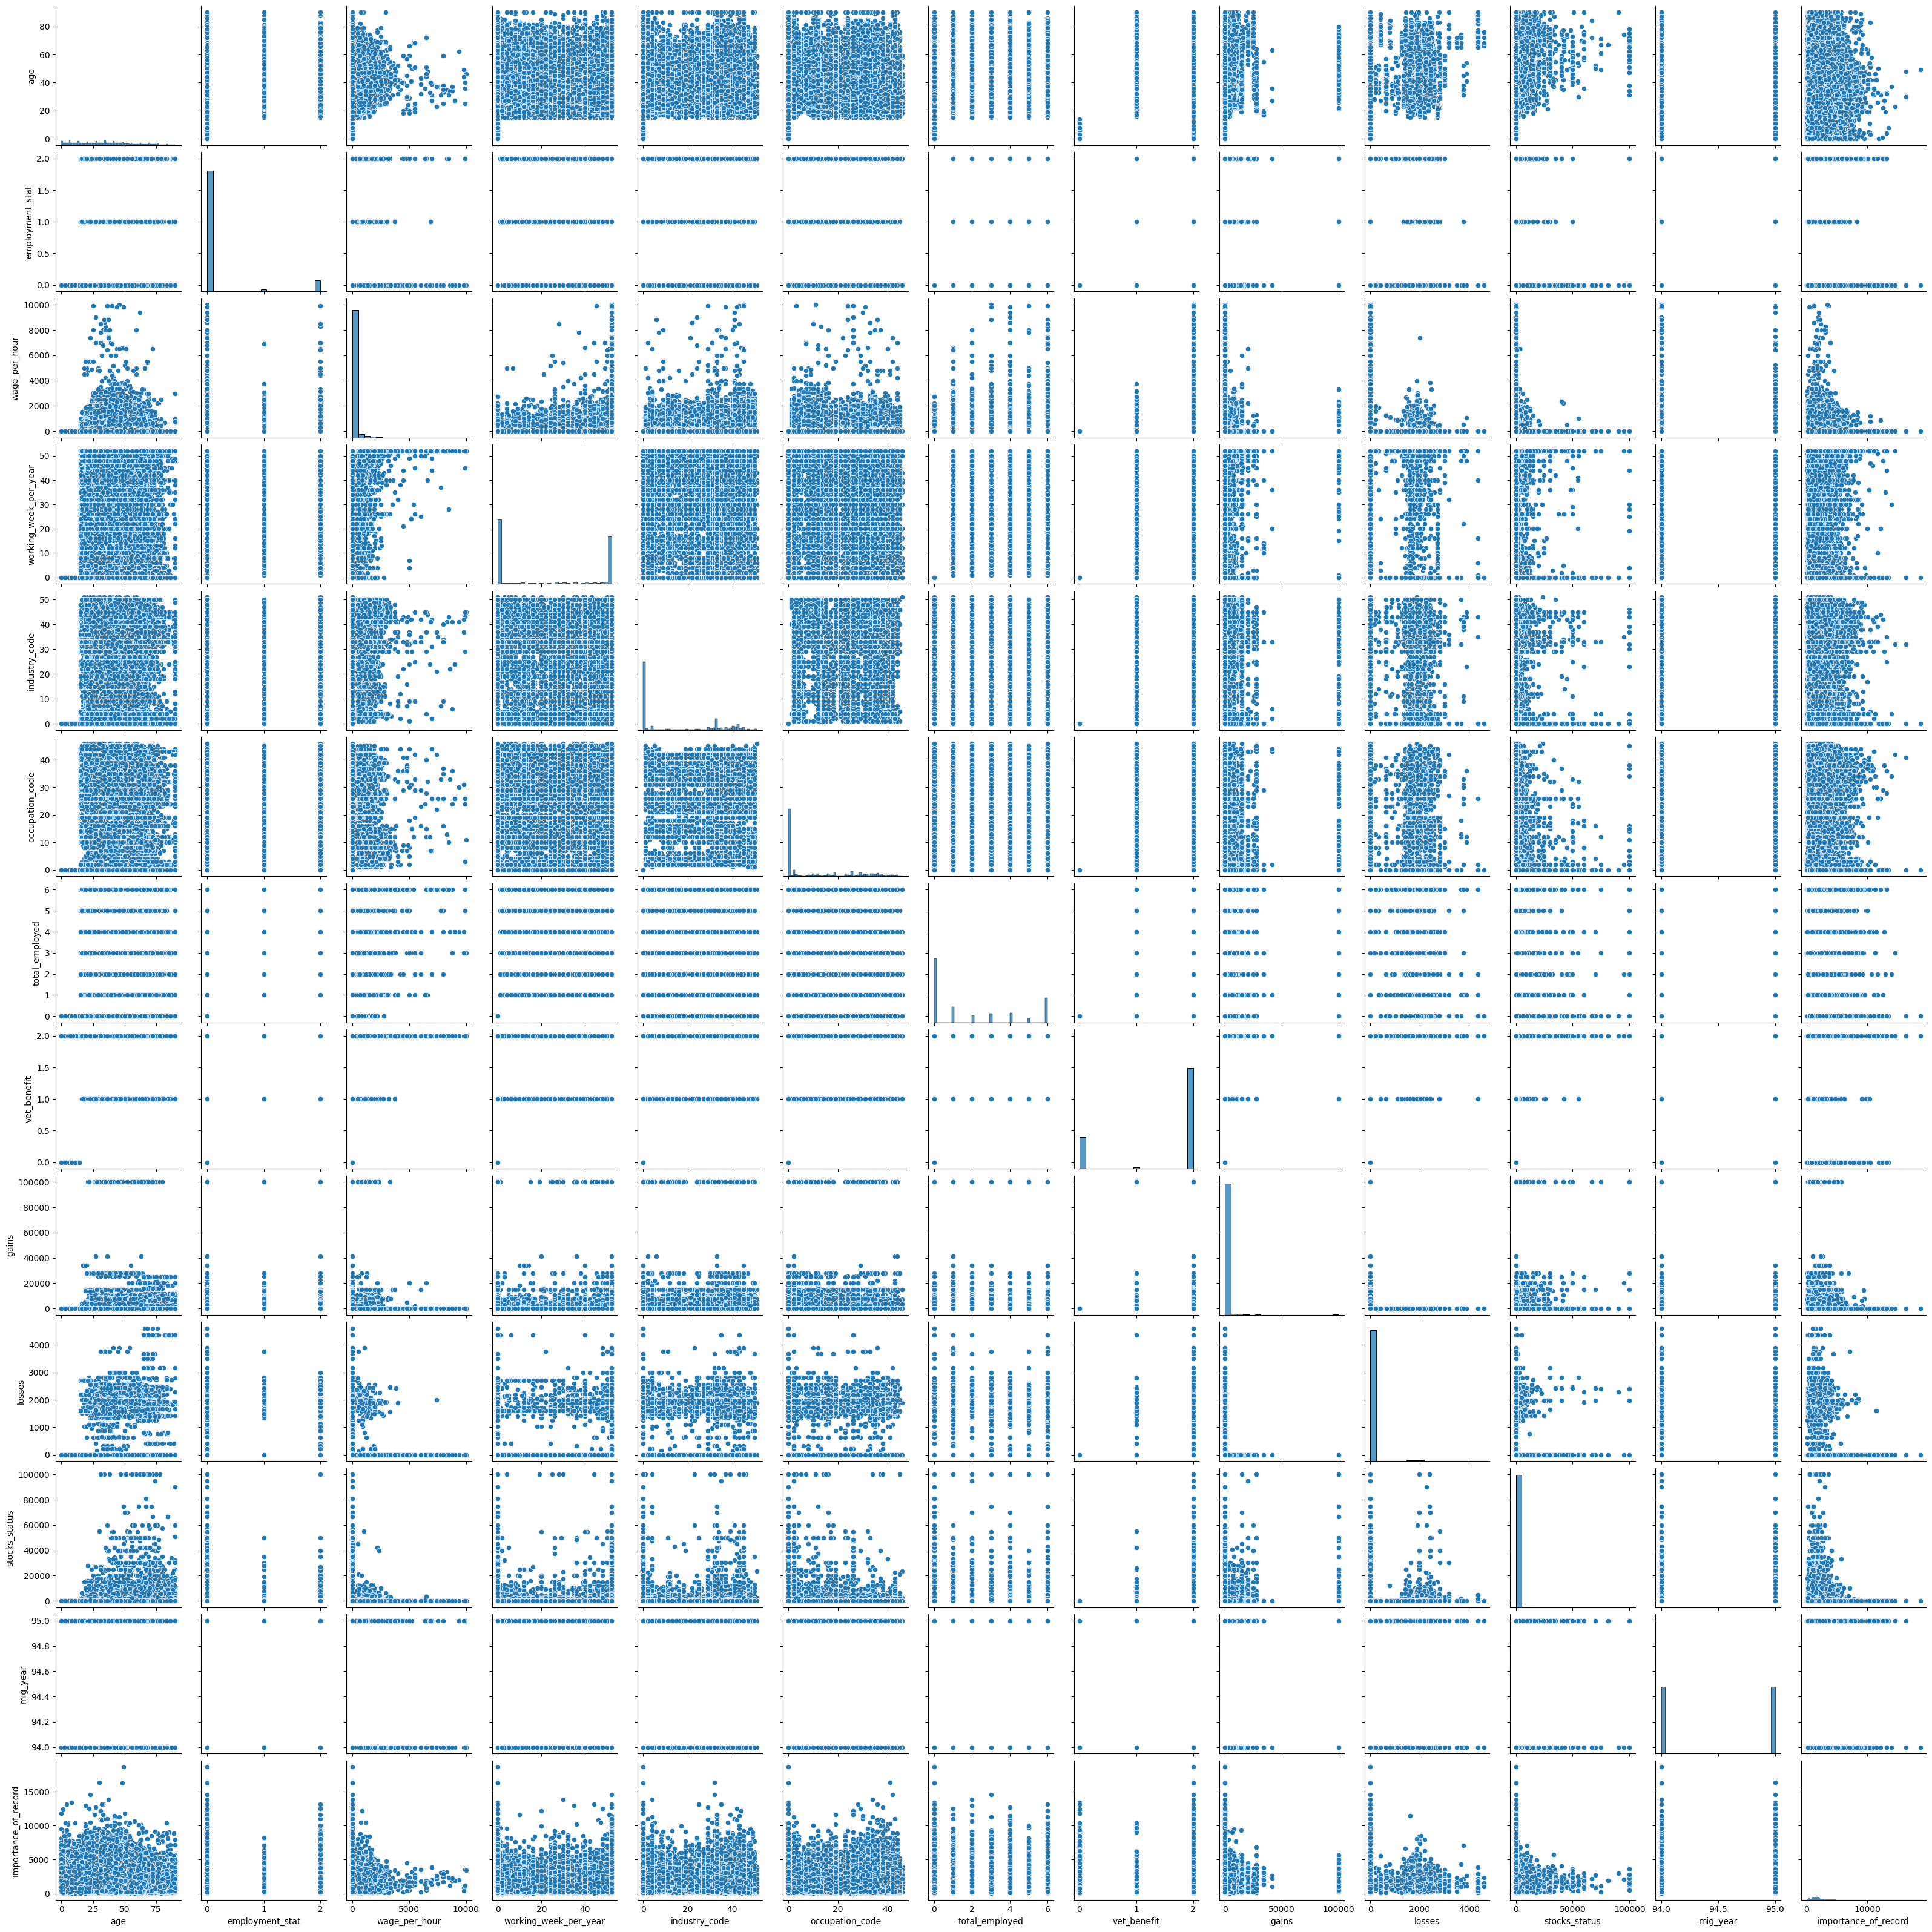

In [19]:
# Creating a pairplot of dataset
sns.pairplot(data1,palette="#fa8072 ")
plt.show()

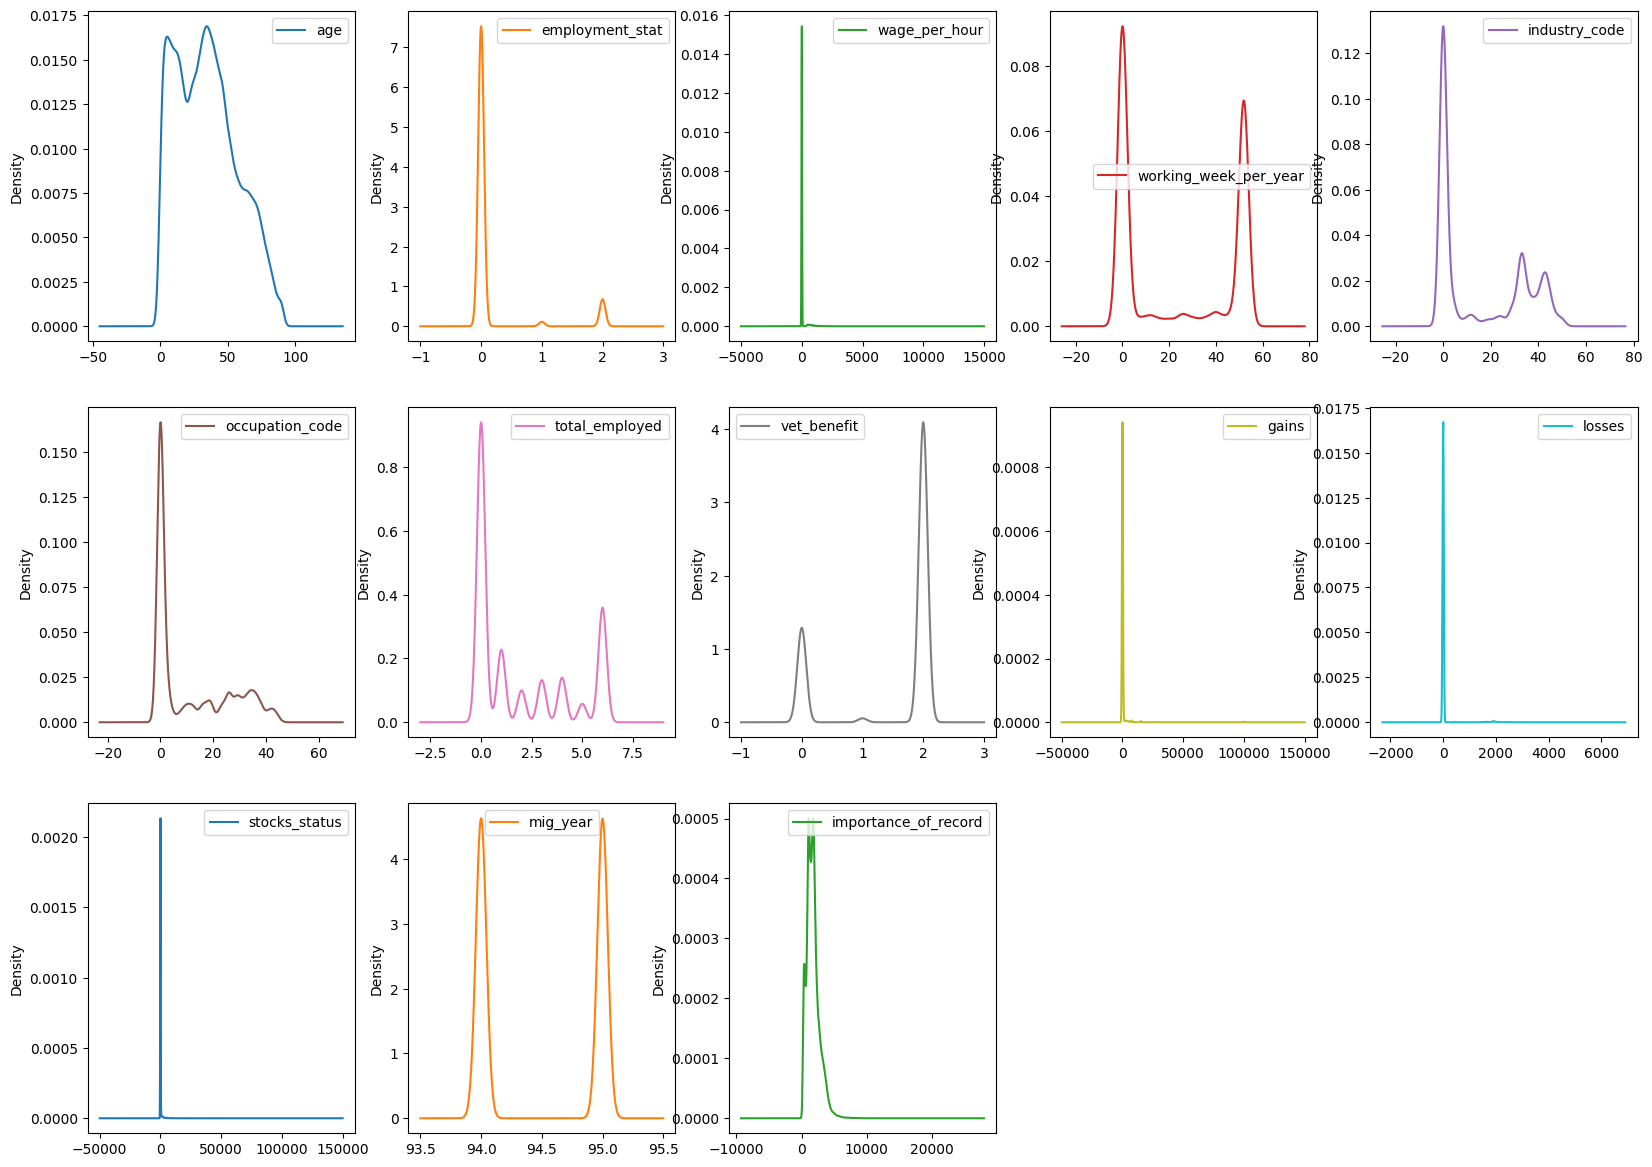

In [20]:
data1.plot(kind="density",subplots=True,layout=(6,5),figsize=(20,30),sharex=False,sharey=False);

##  Data Preprocessing

In [21]:
data1.isnull

<bound method DataFrame.isnull of                 ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government     

In [22]:
round((data1.isna().sum() / data1.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [23]:
data1 = data1.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [24]:
round((data1.isna().sum() / data1.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [25]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in data1.columns:
    if data1[cols].isna().sum()/data1.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [26]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [27]:
data1 = data1.drop(nan_cols_drop,axis=1)

In [28]:
round((data1.isna().sum() / data1.shape[0]) * 100, 2).astype(str) + ' %'

ID                       0.0 %
age                      0.0 %
gender                   0.0 %
education                0.0 %
marital_status           0.0 %
race                     0.0 %
is_hispanic              0.0 %
employment_commitment    0.0 %
employment_stat          0.0 %
wage_per_hour            0.0 %
working_week_per_year    0.0 %
industry_code            0.0 %
industry_code_main       0.0 %
occupation_code          0.0 %
total_employed           0.0 %
household_stat           0.0 %
household_summary        0.0 %
vet_benefit              0.0 %
tax_status               0.0 %
gains                    0.0 %
losses                   0.0 %
stocks_status            0.0 %
citizenship              0.0 %
mig_year                 0.0 %
importance_of_record     0.0 %
income_above_limit       0.0 %
dtype: object

## Cheking Outliers

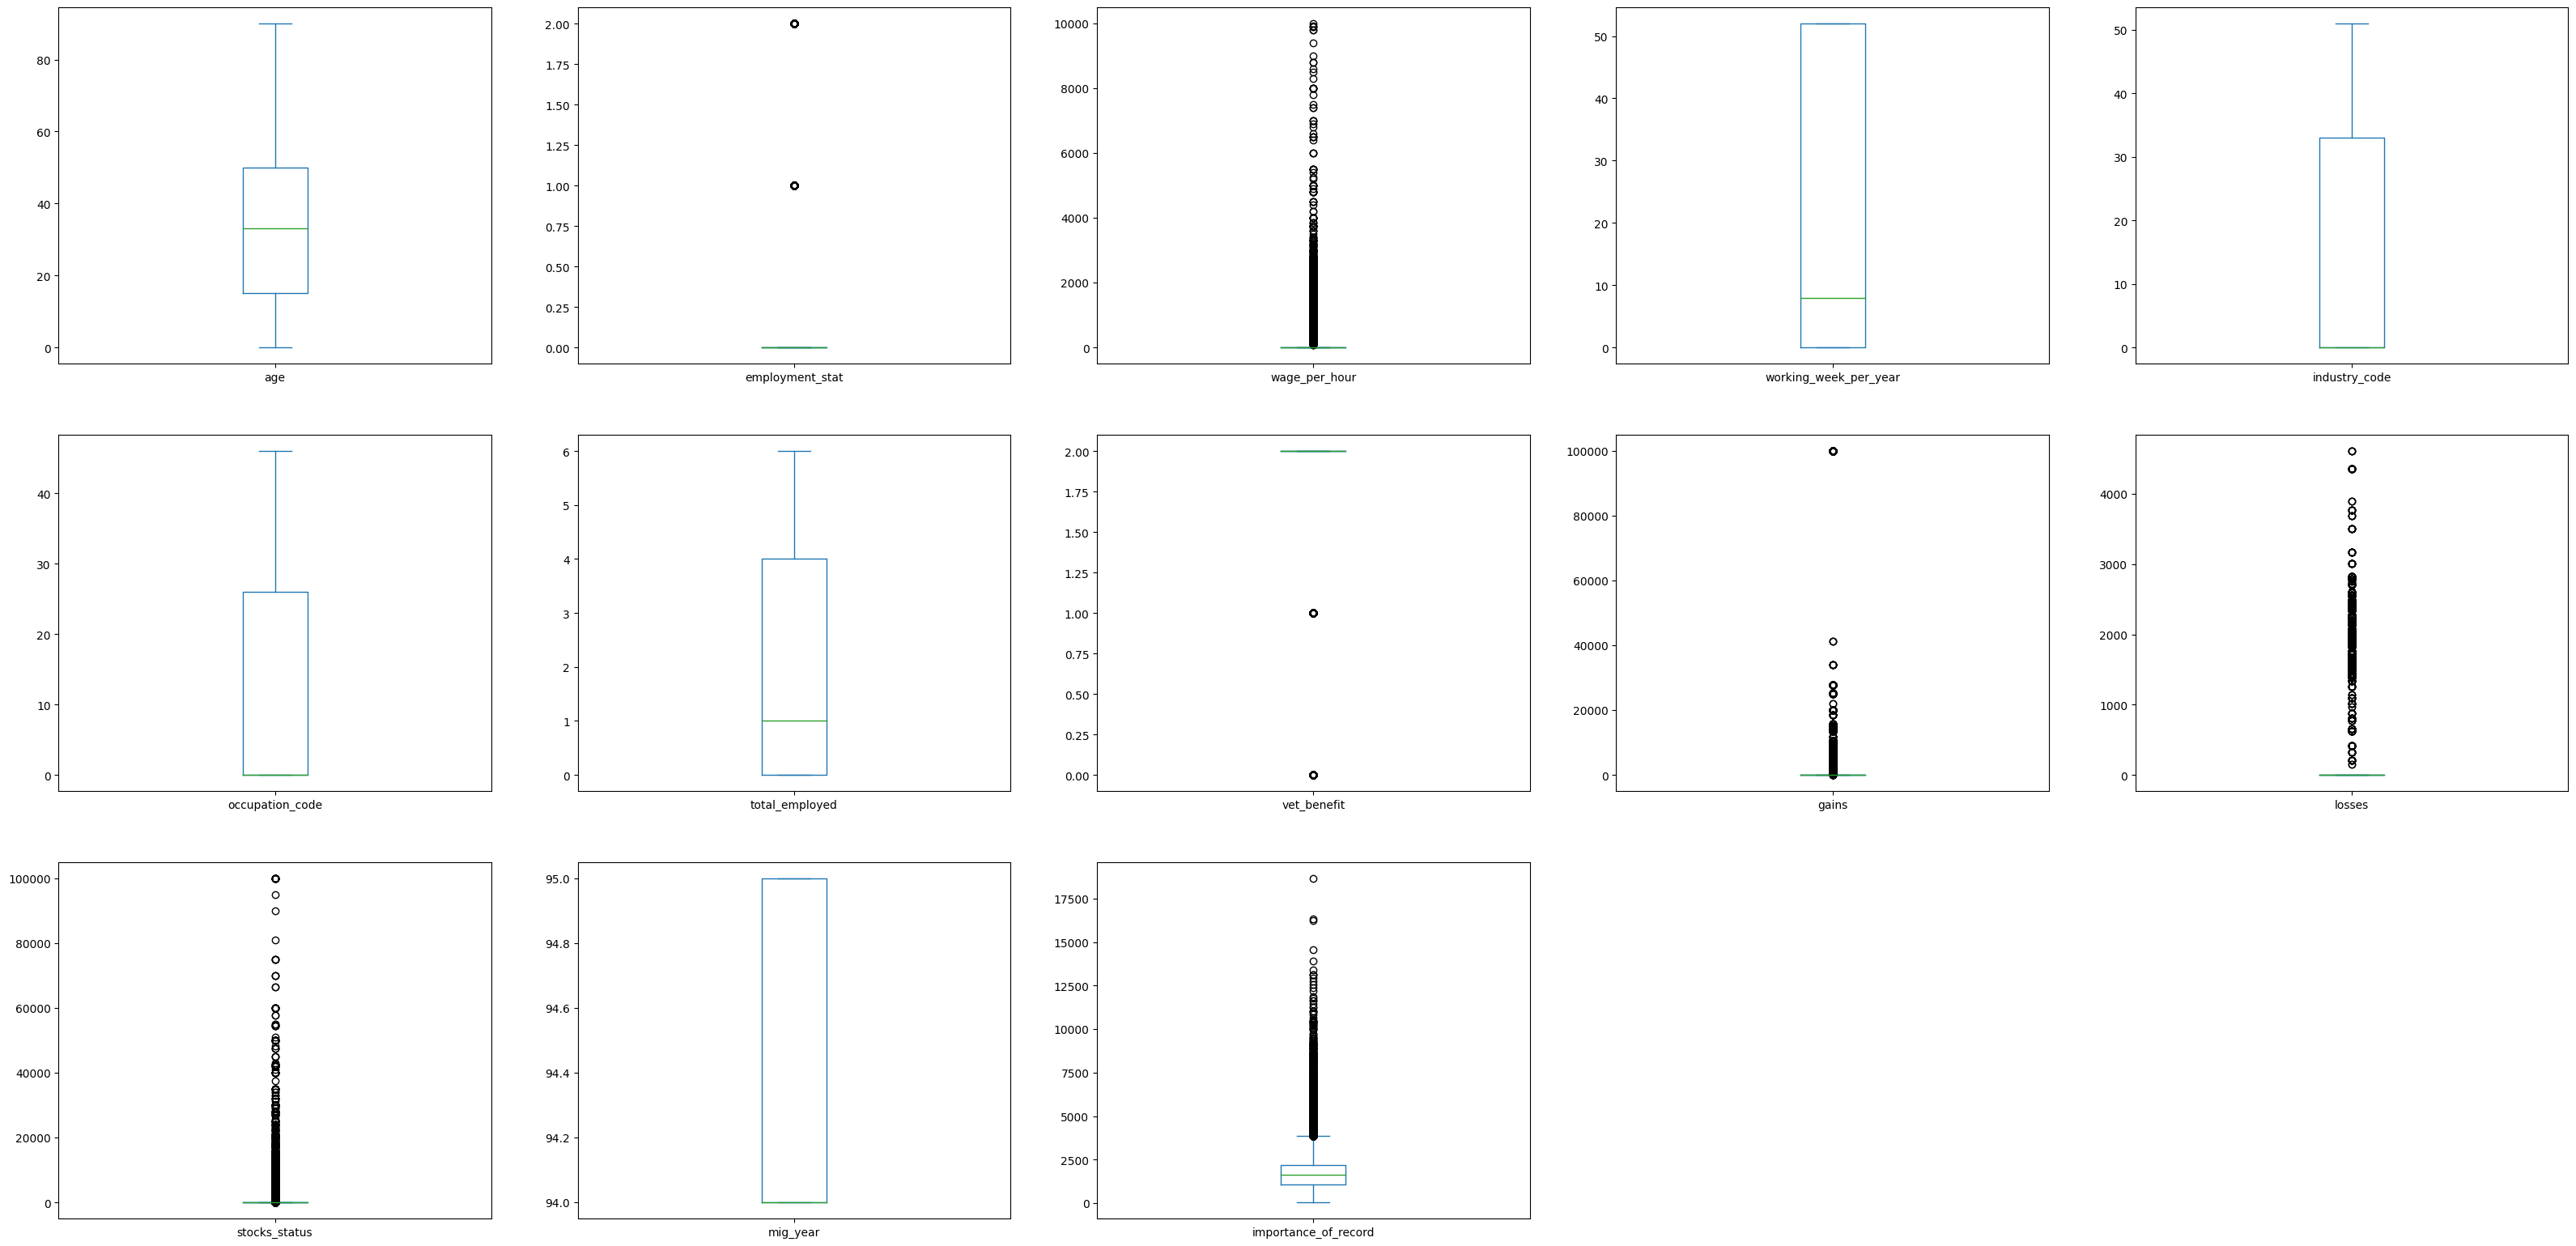

In [29]:
data1.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(40,40), 
                sharex=False, 
                sharey=False);

In [30]:
numerical_feature = [feature for feature in data1.columns if data1[feature].dtypes != 'O']
categorical_feature = [feature for feature in data1.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,data1[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [31]:
data1.drop(columns=['household_stat'],axis=1,inplace=True)

In [32]:
print('The class Imbalance in the data is given below')
print(data1 ['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{data1['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: proportion, dtype: float64


## Balancing the imbalance data

In [33]:
x,y = data1.drop(['ID','income_above_limit'],axis=1),data1['income_above_limit']

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [35]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    50.0
Above limit    50.0
Name: proportion, dtype: float64


## Slipting the Data For Train and Test

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(314401, 23) (78601, 23) (314401,) (78601,)


In [38]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

age   gender                            education  \
0   32     Male                 High school graduate   
1   74   Female                 High school graduate   
2   43     Male   Associates degree-academic program   
3   43     Male           Some college but no degree   
4   22   Female           Some college but no degree   

                     marital_status    race     is_hispanic  \
0                          Divorced   White       All other   
1   Married-civilian spouse present   White       All other   
2                     Never married   White       All other   
3                     Never married   White       All other   
4                     Never married   White   Other Spanish   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0              0   
1   Children or Armed Forces                0              0   
2      Unemployed part- time                0              0   
3        Full-time schedules                0              0   
4         Not in labor force                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52             49         Public administration   
1                      0              0   Not in universe or children   
2                     52             29                Transportation   
3                     52             30                Communications   
4                      0              0   Not in universe or children   

   occupation_code  total_employed       household_summary  vet_benefit  \
0               33               1             Householder            2   
1                0               0   Spouse of householder            2   
2               15               6             Householder            2   
3               14               6             Householder            2   
4                0               0       Child 18 or older            2   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household      0       0              0      Native        94   
1            Nonfiler      0       0              0      Native        94   
2              Single      0       0              0      Native        95   
3              Single      0       0            125      Native        95   
4            Nonfiler      0       0              0      Native        95   

   importance_of_record  
0               1207.45  
1               2242.96  
2               3371.85  
3               1315.73  
4                691.33

In [39]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

age   gender                    education  \
0   28     Male         High school graduate   
1   21     Male         High school graduate   
2   43   Female   Some college but no degree   
3   40   Female                   11th grade   
4    6     Male                     Children   

                     marital_status    race                 is_hispanic  \
0   Married-civilian spouse present   White                Puerto Rican   
1                     Never married   White                   All other   
2   Married-civilian spouse present   White                   All other   
3                           Widowed   White   Central or South American   
4                     Never married   White                   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0              0   
1        Full-time schedules                0            800   
2        Full-time schedules                0              0   
3   Children or Armed Forces                0            650   
4   Children or Armed Forces                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              4                  Construction   
1                     45              4                  Construction   
2                     52             29                Transportation   
3                     52             33                  Retail trade   
4                      0              0   Not in universe or children   

   occupation_code  total_employed              household_summary  \
0               34               2                    Householder   
1               39               6                    Householder   
2               38               6          Spouse of householder   
3               26               3                    Householder   
4                0               0   Child under 18 never married   

   vet_benefit            tax_status  gains  losses  stocks_status  \
0            2   Joint both under 65      0       0              0   
1            2                Single  27828       0              0   
2            2   Joint both under 65      0       0              0   
3            2     Head of household      0       0              0   
4            0              Nonfiler      0       0              0   

  citizenship  mig_year  importance_of_record  
0      Native        94                905.79  
1      Native        95               1299.69  
2      Native        95               3852.26  
3      Native        94               1081.40  
4      Native        95               3522.25

## Encoding

In [40]:


columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main','household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [41]:
X_train_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             1.0           0.0                    0.0                    0.0   
2             0.0           1.0                    0.0                    0.0   
3             0.0           1.0                    0.0                    0.0   
4             1.0           0.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            1.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    0.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    0.0                  0.0   
4                                    0.0                  0.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   0.0                              1.0   
1                                   0.0                              1.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       1.0   
1                        

In [42]:
X_train_encoded.shape

(314401, 105)

In [43]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             0.0           1.0                    0.0                    0.0   
2             1.0           0.0                    0.0                    0.0   
3             1.0           0.0                    0.0                    1.0   
4             0.0           1.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            0.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    0.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    0.0                  0.0   
4                                    0.0                  1.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   0.0                              1.0   
1                                   0.0                              1.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       0.0   
1                        

In [44]:
X_test_encoded.shape

(78601, 105)

In [45]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

##
Modelling

Random Forest

In [46]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [47]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [48]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [49]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



## XG Boost

In [50]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [52]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [53]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.94      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



In [54]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [55]:
train_probas = pd.DataFrame(ran_for.predict_proba(X_train_encoded))
train_probas.columns = ['Below limit', 'Above limit']

test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
test_probas.columns = ['Below limit', 'Above limit']

In [56]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [57]:
train_data.reset_index(inplace=True, drop=True)
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
rf_merged_train = pd.concat([train_data, train_probas], axis = 1)

test_data.reset_index(inplace=True, drop=True)
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_merged_test = pd.concat([test_data, test_probas], axis = 1)

In [58]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [59]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

In [60]:
rf_test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [61]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [62]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [63]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [64]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')

In [65]:
import shap

In [66]:
shap.initjs()

In [67]:
sample_set = X_train_encoded.sample(10)

In [68]:
explainer = shap.Explainer(ran_for)

In [69]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

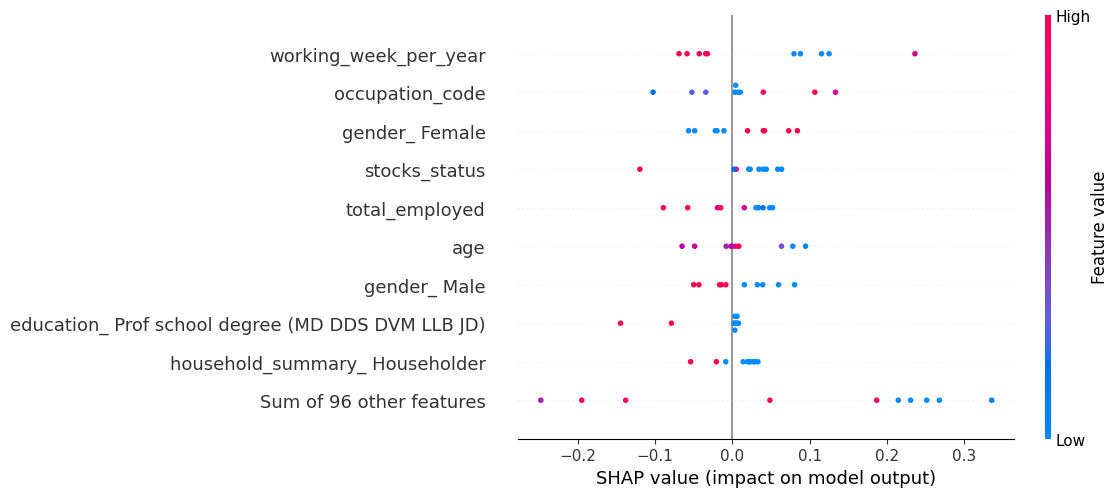

In [70]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

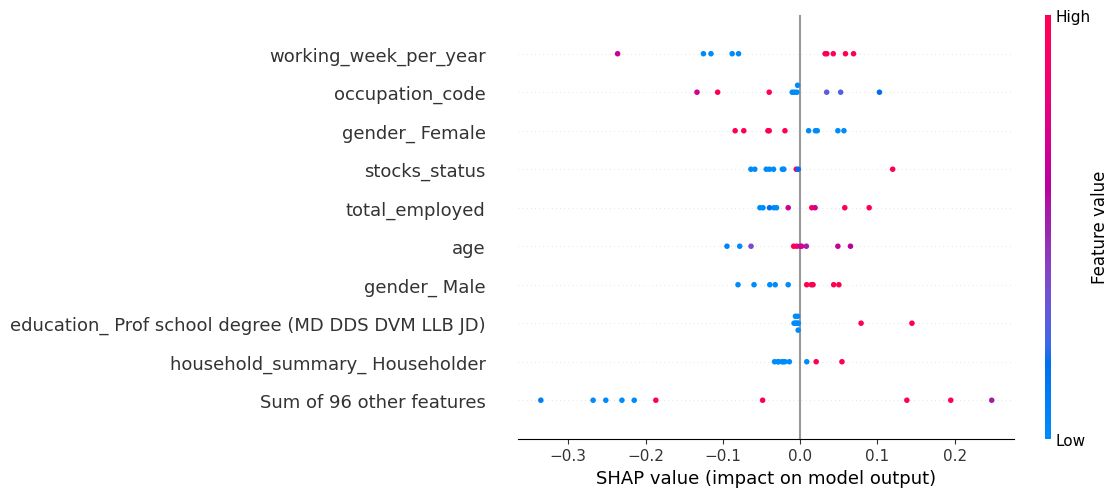

In [71]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])

In [72]:
choosen_instance = sample_set.iloc[0,:]
shap_values_fp = explainer.shap_values(choosen_instance)

In [73]:
shap.force_plot(explainer.expected_value[1], shap_values_fp[1], choosen_instance)

In [74]:
shap.force_plot(explainer.expected_value[0], shap_values_fp[0], choosen_instance)

In [75]:
choosen_instance2 = sample_set.iloc[0:5,:]
shap_values_fp_2 = explainer.shap_values(choosen_instance2)

In [76]:
shap.force_plot(explainer.expected_value[0], shap_values_fp_2[0], choosen_instance2,plot_cmap="DrDb")

In [77]:
shap.force_plot(explainer.expected_value[1], shap_values_fp_2[1], choosen_instance2,plot_cmap="DrDb")

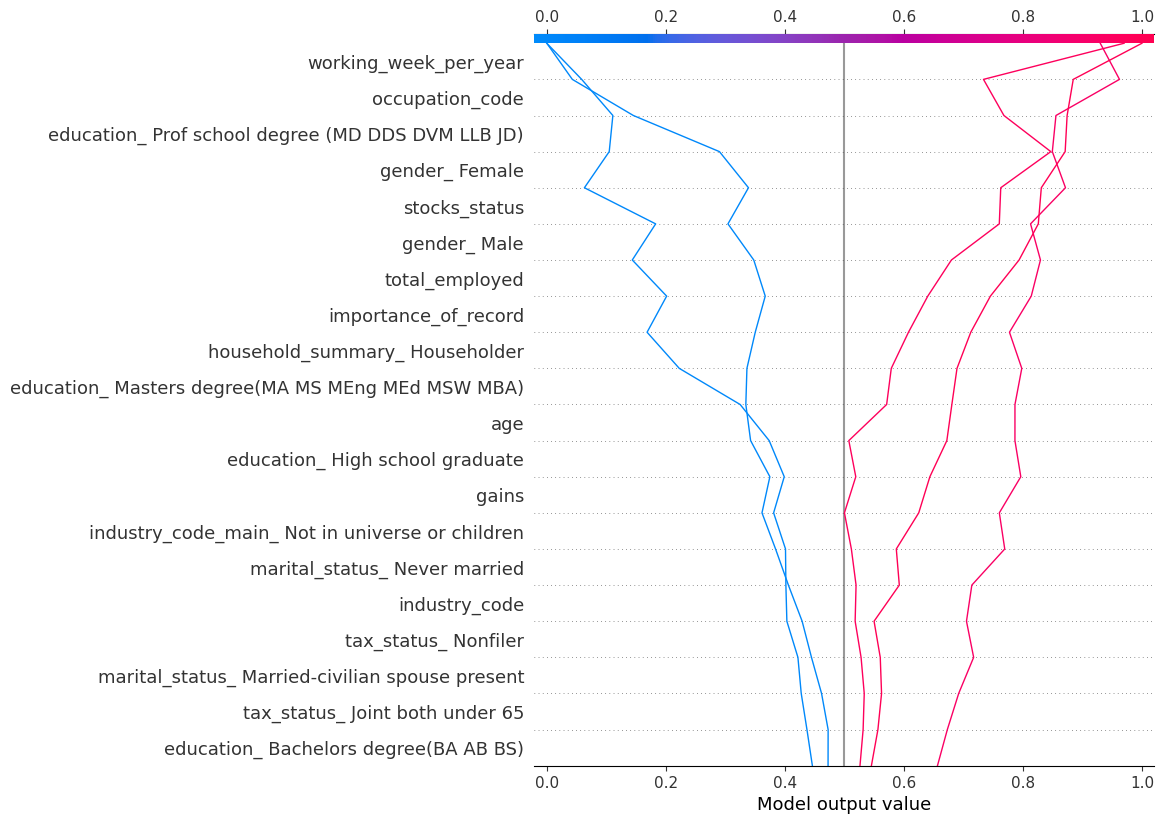

In [78]:
shap.decision_plot(explainer.expected_value[0], shap_values_fp_2[0],feature_names=list(X_train_encoded.columns))